In [1]:
include("init.jl")

In [2]:
using Gadfly
using MLUtilities
using SGMCMC

normldf(x,mu,var) =  -.5*log(2.0*pi*var) -.5*((x-mu).*(x-mu))/var
normpdf(x,mu,var) = exp(normldf(x,mu,var))

mu = 2.5
var = 1.0
rel = .03
mu2 = mu*rel
var2 = var*rel*rel
mixldf(x) = log(.5) + logsumexp(normldf(x,mu,var), normldf(x,-mu,var))[1]
function mixgrad(x)
  lp1 = normldf(x,-mu,var)
  lp2 = normldf(x,mu,var)
  pp = exp(lp1 - logsumexp(lp1,lp2))
  (pp.*(-mu-x) + (1.0-pp).*(mu-x))/var
end
function mixldf2(x)
  2*log(.5) + logsumexp(normldf(x[1],-mu,var), normldf(x[1],+mu,var)) +
  logsumexp(normldf(x[2],-mu2,var2), normldf(x[2],+mu2,var2))
end
function mixgrad2(x)
  g = zeros(2)
  lp1 = normldf(x[1],-mu,var)
  lp2 = normldf(x[1],mu,var)
  pp = exp(lp1 - logsumexp(lp1,lp2))
  g[1] = (pp*(-mu-x[1]) + (1.0-pp)*(mu-x[1]))/var
  lp1 = normldf(x[2],-mu2,var2)
  lp2 = normldf(x[2],mu2,var2)
  pp = exp(lp1 - logsumexp(lp1,lp2))
  g[2] = (pp*(-mu2-x[2]) + (1.0-pp)*(mu2-x[2]))/var2
  g
end
randgrad(x) = mixgrad(x) + randn(1)
randgrad2(x) = mixgrad2(x) + randn(2)




randgrad2 (generic function with 1 method)

In [23]:
println("Checking that gradients are correct")
MLUtilities.checkgrad([.1],mixldf,mixgrad)
MLUtilities.checkgrad([.1 .1],mixldf2,mixgrad2)

# 1 D case
println("1D HMC")
niters = 10000
nburnin = 1000
eps = 1.0
xx = zeros(1)
tsamples = zeros(1,niters)
accprobs = zeros(niters)
for iter = 1:nburnin
  (xx,aa) = SGMCMC.hmc(xx,mixgrad,mixldf,eps=eps)
end
for iter = 1:niters
  (xx,aa) = SGMCMC.hmc(xx,mixgrad,mixldf,eps=eps)
  tsamples[:,iter] = xx
  accprobs[iter] = aa
end

Checking that gradients are correct
CheckGrad on mixldf with stepsize 1.0e-6
Maximum difference: 2.4369158881931696e-6
Mean difference:    2.4369158881931696e-6
CheckGrad on mixldf2 with stepsize 1.0e-6
Maximum difference: 0.0005555549454321351
Mean difference:    0.00027899593066016415
1D HMC


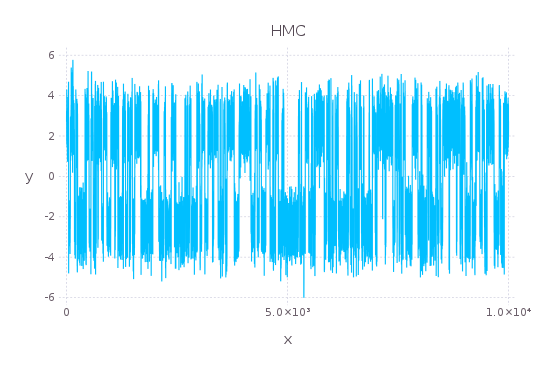

In [27]:
plot(x=1:niters,y=tsamples, Guide.title("HMC"), Geom.line())

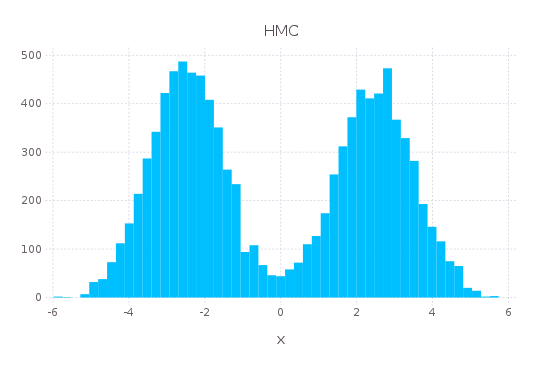

In [25]:
plot(x=tsamples, Geom.histogram(bincount=50), Guide.xlabel("x"), Guide.title("HMC"))

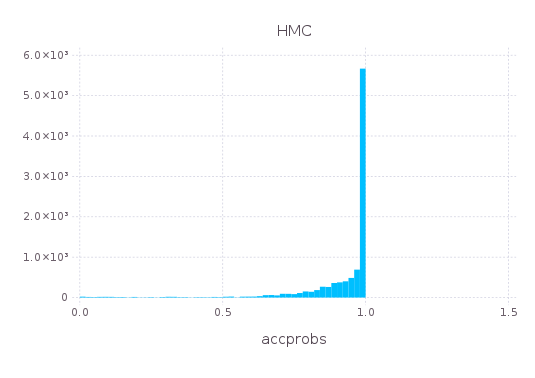

In [26]:
plot(x=accprobs, Geom.histogram(bincount=50), Guide.xlabel("accprobs"), Guide.title("HMC"))

In [42]:
println("1D RELHMC")
niters = 10000
nburnin = 1000
eps = 1.0
xx = zeros(1)
tsamples = zeros(1,niters)
accprobs = zeros(niters)
for iter = 1:nburnin
    (xx,aa) = SGMCMC.relhmc(xx,mixgrad,mixldf,eps=eps, mass=5.0, c=5.0)
end
for iter = 1:niters
    (xx,aa) = SGMCMC.relhmc(xx,mixgrad,mixldf,eps=eps, mass=5.0, c=5.0)
  tsamples[:,iter] = xx
  accprobs[iter] = aa
end

1D RELHMC


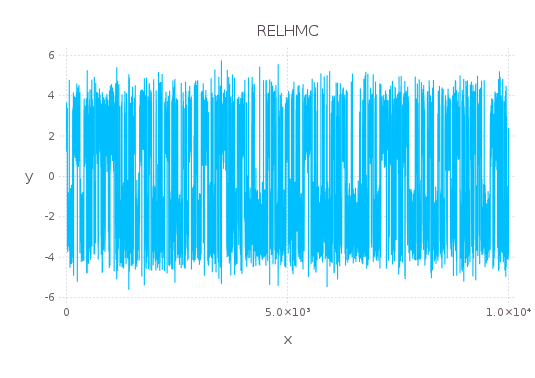

In [43]:
plot(x=1:niters,y=tsamples, Guide.title("RELHMC"), Geom.line())

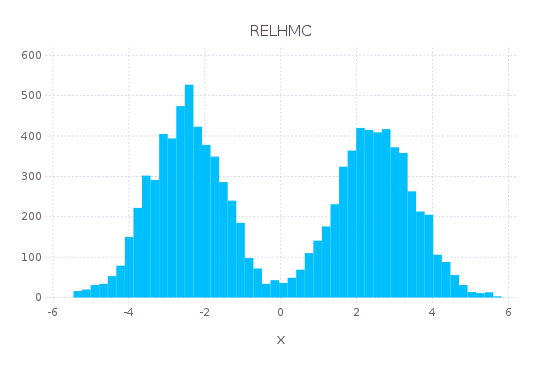

In [41]:
plot(x=tsamples, Geom.histogram(bincount=50), Guide.xlabel("x"), Guide.title("RELHMC"))

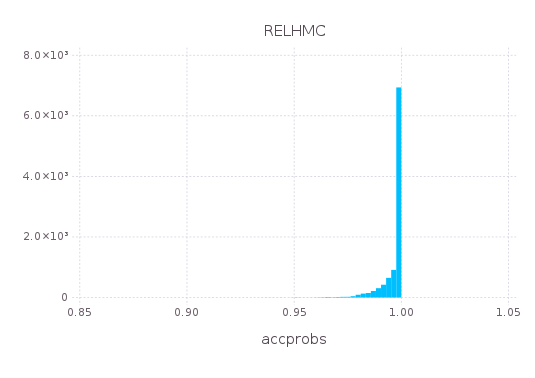

In [32]:
plot(x=accprobs, Geom.histogram(bincount=50), Guide.xlabel("accprobs"), Guide.title("RELHMC"))

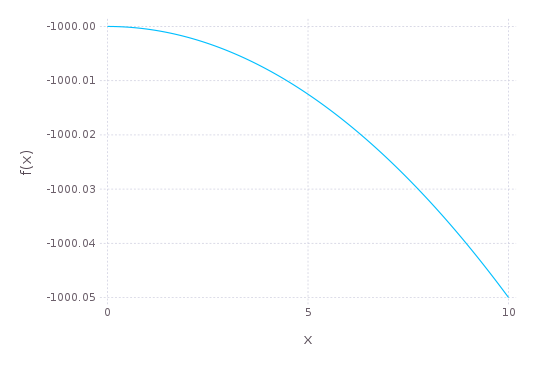

In [56]:
m=10.0; c=10.0; plot(x -> (- (x^2 + m^2 * c^4)^0.5), 0 ,10)